# KNN




Installing all the Ncessary Libraries

In [39]:
!pip install opencv-python-headless scikit-learn matplotlib

*Downloading the Datata set from Kaggle *

In [40]:
import kagglehub
dataset=kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')

*Importing all the Libraries*

In [41]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm


In [42]:
print(os.listdir(dataset))

['animals', 'images']


In [43]:
dataset=os.path.join(dataset,"animals")
print(os.listdir(dataset))

['animals', 'images', 'dogs', 'panda', 'cats']


In [44]:
dataset=os.path.join(dataset,"animals")
print(os.listdir(dataset))

['dogs', 'panda', 'cats']


In [45]:
categories= os.listdir(dataset)
print(categories)

['dogs', 'panda', 'cats']


# Main Code (Data processing)
> Printing the lables of the images

In [46]:
print([os.listdir(os.path.join(dataset,category))for category in categories])


[['dogs_00583.jpg', 'dogs_00683.jpg', 'dogs_00750.jpg', 'dogs_00652.jpg', 'dogs_00895.jpg', 'dogs_00686.jpg', 'dogs_00622.jpg', 'dogs_00291.jpg', 'dogs_00944.jpg', 'dogs_00082.jpg', 'dogs_00955.jpg', 'dogs_00309.jpg', 'dogs_00253.jpg', 'dogs_00416.jpg', 'dogs_00646.jpg', 'dogs_00463.jpg', 'dogs_00688.jpg', 'dogs_00732.jpg', 'dogs_00137.jpg', 'dogs_00602.jpg', 'dogs_00647.jpg', 'dogs_00976.jpg', 'dogs_00636.jpg', 'dogs_00226.jpg', 'dogs_00359.jpg', 'dogs_00684.jpg', 'dogs_00370.jpg', 'dogs_00676.jpg', 'dogs_00500.jpg', 'dogs_00716.jpg', 'dogs_00294.jpg', 'dogs_00041.jpg', 'dogs_00544.jpg', 'dogs_00124.jpg', 'dogs_00429.jpg', 'dogs_00279.jpg', 'dogs_00821.jpg', 'dogs_00957.jpg', 'dogs_00846.jpg', 'dogs_00843.jpg', 'dogs_00391.jpg', 'dogs_00519.jpg', 'dogs_00452.jpg', 'dogs_00618.jpg', 'dogs_00875.jpg', 'dogs_00381.jpg', 'dogs_00692.jpg', 'dogs_00917.jpg', 'dogs_00167.jpg', 'dogs_00122.jpg', 'dogs_00473.jpg', 'dogs_00625.jpg', 'dogs_00753.jpg', 'dogs_00835.jpg', 'dogs_00660.jpg', 'dogs_00

In this section of code, Loads 100 grayscale images per category from a dataset folder. Resizes them to 100x100 pixels [ it is optional ]. Associates each image with a numerical label. Stores them in the train_data list for training a model later

In [47]:
import random
train_data=[]
for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)
    images = os.listdir(path)
    random.shuffle(images)


    for img in images[:100]:
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)
import random
train_data=[]
for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)
    images = os.listdir(path)
    random.shuffle(images)


    for img in images[:100]:
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.resize(img_gray, (100, 100))
        train_data.append([img_gray, label])

Printnig 10 labeles from the train_data

In [48]:
np.random,random.shuffle(train_data)
print([train_data[i][1] for i in range(10)])

[1, 0, 2, 1, 0, 2, 0, 1, 2, 1]


This will show 30 sample images from your dataset, each labeled by its corresponding class index.

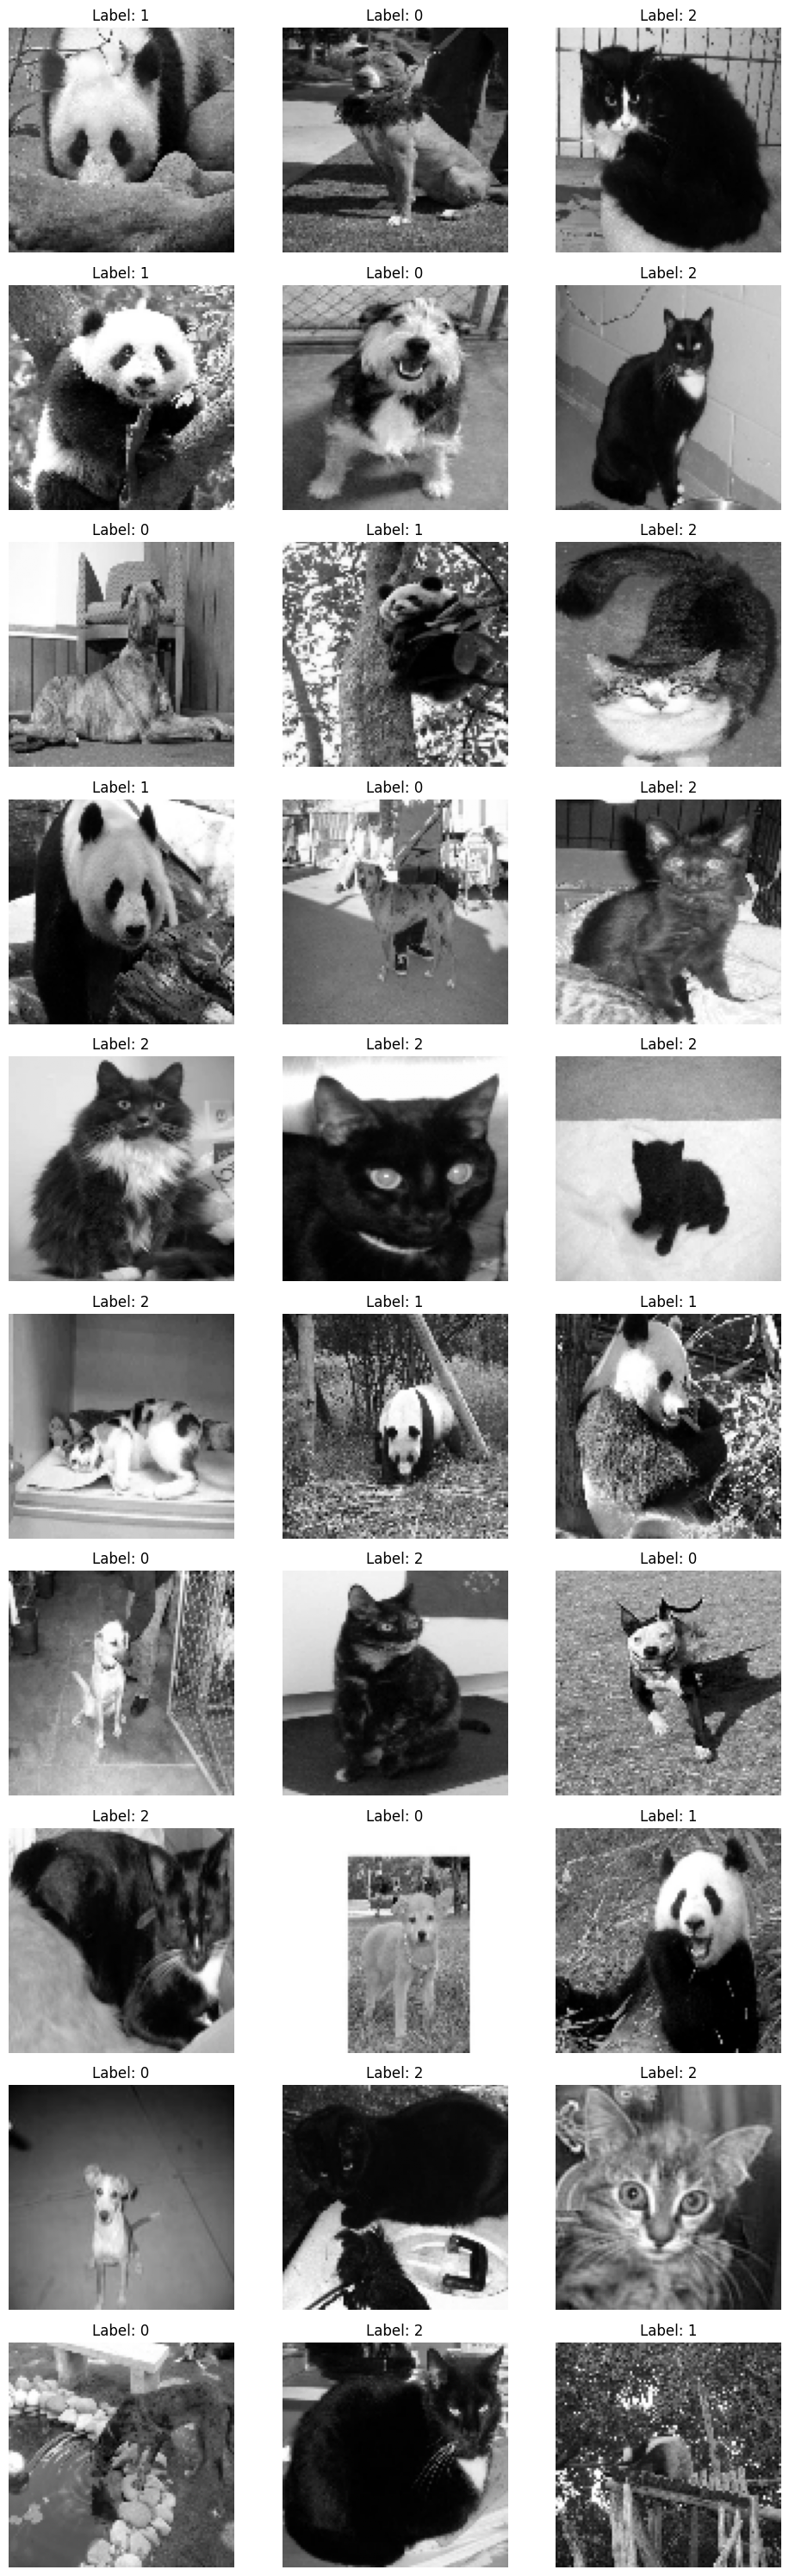

In [49]:
fig, axes = plt.subplots(10,3,figsize=(10,30))
for i,ax in enumerate(axes.flat):
    img_array,labels = train_data[i]
    ax.imshow(img_array,cmap='gray')
    ax.set_title(f"Label: {labels}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [50]:
folds=[]
for i in range(5):
    folds.append(train_data[i::5])

len(folds)

5

This is used for cross-validation, where, evaluate how well model generalizes to unseen data.

In [51]:
for fold_index in range(len(folds)):
  fold= folds[fold_index]
  labels=[label for _,label in fold]
  print(f"Fold {fold_index+1} labels: {labels}")


Fold 1 labels: [1, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1]
Fold 2 labels: [0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0]
Fold 3 labels: [2, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0]
Fold 4 labels: [1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 2]
Fold 5 labels: [0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1]


This function here , compaires the difference between the train_data

In [52]:
from re import T
def l2_distance(valid_img, train_imag):
  rece = valid_img -train_imag
  sqared_differnce = np.square(rece)
  sum_sqared_differnce = np.sum(sqared_differnce)
  distance = np.sqrt(sum_sqared_differnce)
  return distance


In [53]:
from collections import Counter
def knn_prediction(l2_distance,k=1):
  negrest_neghbour = l2_distance[:k]
  labels = [label for _, label in negrest_neghbour]
  labels_counts=Counter(labels)
  most_common = labels_counts.most_common(1)
  return most_common[0][0]

Here we get the result of accurucy , by incrementing the value of K . as we are using KNN

In [54]:
fold_accuracies = []
avg_accuracies = []

for k in range(1, 31):
    accuracies = []

    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []

        for valid_img in valid_set:
            l2_distances = [
                (l2_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l2_distances.sort()

            predicted_label = knn_prediction(l2_distances, k)
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    fold_accuracies.append(accuracies)
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies.append(avg_accuracy)

    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")


K = 1:
  Average Accuracy: 0.39

K = 2:
  Average Accuracy: 0.39

K = 3:
  Average Accuracy: 0.44

K = 4:
  Average Accuracy: 0.44

K = 5:
  Average Accuracy: 0.45

K = 6:
  Average Accuracy: 0.45

K = 7:
  Average Accuracy: 0.45

K = 8:
  Average Accuracy: 0.46

K = 9:
  Average Accuracy: 0.45

K = 10:
  Average Accuracy: 0.45

K = 11:
  Average Accuracy: 0.47

K = 12:
  Average Accuracy: 0.46

K = 13:
  Average Accuracy: 0.46

K = 14:
  Average Accuracy: 0.47

K = 15:
  Average Accuracy: 0.46

K = 16:
  Average Accuracy: 0.45

K = 17:
  Average Accuracy: 0.49

K = 18:
  Average Accuracy: 0.48

K = 19:
  Average Accuracy: 0.49

K = 20:
  Average Accuracy: 0.50

K = 21:
  Average Accuracy: 0.52

K = 22:
  Average Accuracy: 0.51

K = 23:
  Average Accuracy: 0.51

K = 24:
  Average Accuracy: 0.51

K = 25:
  Average Accuracy: 0.51

K = 26:
  Average Accuracy: 0.52

K = 27:
  Average Accuracy: 0.51

K = 28:
  Average Accuracy: 0.50

K = 29:
  Average Accuracy: 0.50

K = 30:
  Average Accu

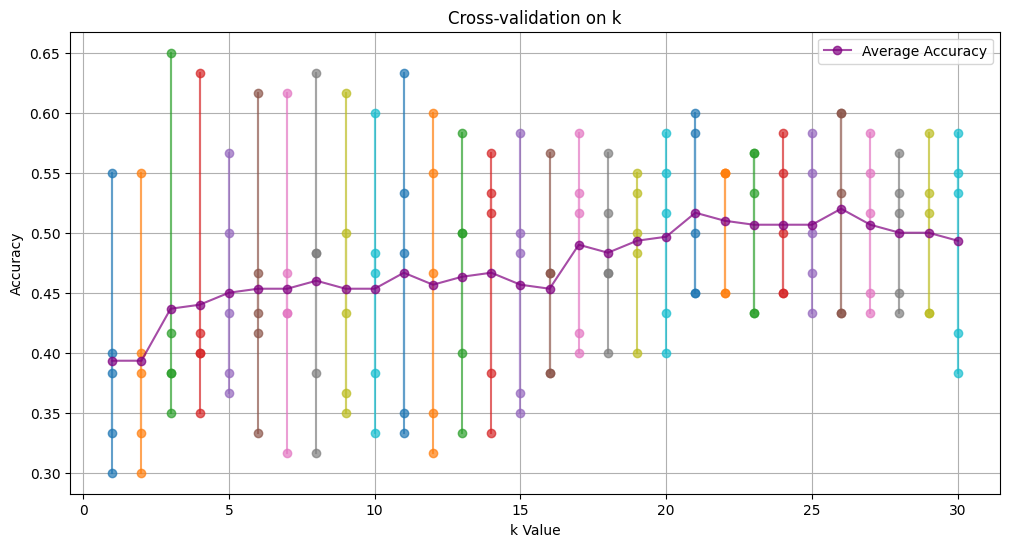

In [55]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))


colors = plt.cm.tab10.colors

for k in range(30):
    fold_accuracy = fold_accuracies[k]
    plt.plot([k + 1] * len(fold_accuracy), fold_accuracy, linestyle='-', marker='o', alpha=0.7, color=colors[k % len(colors)])  # Cycles through colors


plt.plot(range(1, 31), avg_accuracies, color='purple', alpha=0.7, label='Average Accuracy', linestyle='-', marker='o')


plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k')


plt.grid(True)
plt.legend()


plt.show()


## Discussion
Here in the graph;

X-axis (k Value): Different values of k tried (from 1 to 30).
Y-axis (Accuracy): Classification accuracy for each k.

Colored dots with error bars.

Purple line : ("Average Accuracy").

From the graph we can understand that,

Accuracy increases with k up to around 18–20.Meaning ,best performance is likely around k = 18 to 22.

It also showing that lower k values show high variance, while higher values are more stable.

In short:
this plot helps to pick the optimal k value for k-NN classifier using cross-validation


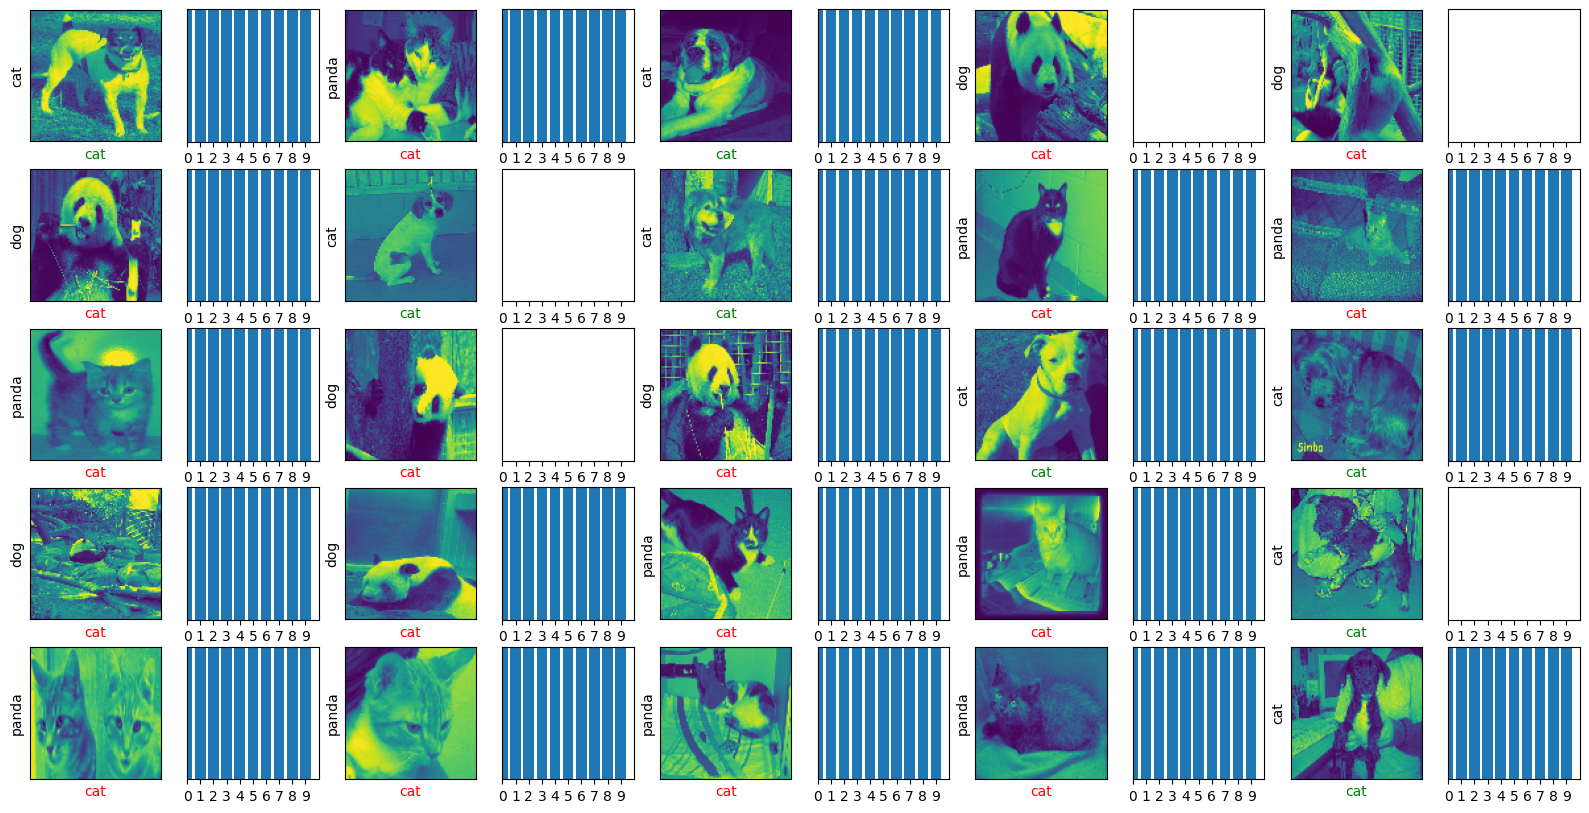

In [56]:
#class_names = ['cat', 'dog', 'panda']
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i]])
    if Y_test[i] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()